# 1. Importing Libraries

In [73]:
# Import Libraries
import pandas as pd # data handling and manipulation
import numpy as np # calculations and handling arrays
import matplotlib.pyplot as plt # visualisations like plots and charts
import seaborn as sns # aesthetic and detailed statistical visualisations
import scipy # advanced mathematical and statistical computations

from scipy import stats # statistical tests and analysis (e.g: t-test, p-val)
import missingno  as mso # visualising and analysing missing data in dataset
 
from imblearn.over_sampling import SMOTE # balancing target classes by creating synthetic samples
from sklearn.preprocessing import MinMaxScaler # normalising data to a 0-1 range
from sklearn.model_selection import train_test_split # splitting data into training and testing sets

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


---

# 2. Reading Dataset

In [74]:
# Import Dataset
file_name = "loan_data_set.csv"
df = pd.read_csv(file_name)

# Check if data frame has been created
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [75]:
df.shape

(614, 13)

 <span style="color:purple">There are 614 rows (loan applications) and 13 columns (different features or variables) in the loan data set </span>

In [76]:
# Explore the dataset
df.info() # Concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [77]:
# Descriptive statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


---

# 3. Data Exploration

## 3.1 Categorical Variables
 <span style="color:purple"> I will firstly explore the categorical variables - these have discrete values so categories are distinct </span>

### 3.1.1 Loan ID

In [78]:
df.Loan_ID.value_counts(dropna=False)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

 <span style="color:purple"> There are 614 unique ID's in the dataset </span>

### 3.1.2 Gender

In [79]:
df.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

 <span style="color:purple">The dataset seems heavily skewed towards Males. There are 13 missing values</span>

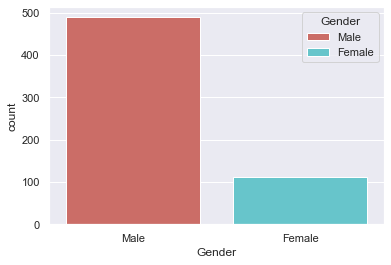

In [80]:
sns.countplot(x='Gender', data=df, palette='hls', hue='Gender')
plt.show()

In [81]:
countMale = len(df[df['Gender'] == 'Male'])
countFemale = len(df[df['Gender'] == 'Female'])
countNull = len(df[df['Gender'].isna()])

print(f'Percentage of Male loan applicants is {countMale/(countMale+countFemale+countNull) * 100:.2f}%')
print(f'Percentage of Female loan applicants is {countFemale/(countMale+countFemale+countNull) * 100:.2f}%')
print(f'Percentage of missing values in Gender column is {countNull/(countMale+countFemale+countNull) * 100:.2f}%')

Percentage of Male loan applicants is 79.64%
Percentage of Female loan applicants is 18.24%
Percentage of missing values in Gender column is 2.12%


 <span style="color:purple">We can confirm from the results above, that the number of Male loan applicants is higher compared to Female applicants. We can also see that roughly 2% of the column contain missing values.</span>

### 3.1.3 Married 

In [82]:
df.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

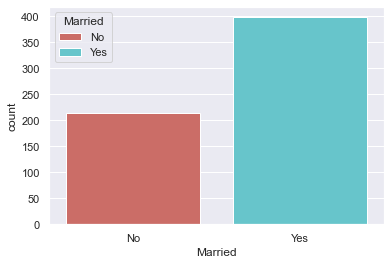

In [83]:
sns.countplot(x='Married', data=df, palette='hls', hue='Married')
plt.show()

In [84]:
countMarried = len(df[df['Married'] == 'Yes'])
countNotMarried = len(df[df['Married'] == 'No'])
countNull = len(df[df['Married'].isna()])

print(f'The percentage of married applicants is {countMarried/(countMarried+countNotMarried+countNull) * 100:.2f}%')
print(f'The percentage of non-married applicants is {countNotMarried/(countMarried+countNotMarried+countNull) * 100:.2f}%')
print(f'The percentage of missing values in the Married column in {countNull/(countMarried+countNotMarried+countNull) * 100:.2f}%')

The percentage of married applicants is 64.82%
The percentage of non-married applicants is 34.69%
The percentage of missing values in the Married column in 0.49%


 <span style="color:purple">The number of married applicants is higher compared to applicants that aren't. A small percentage of the column contains missing values.</span>

### 3.1.4 Education

In [85]:
df.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

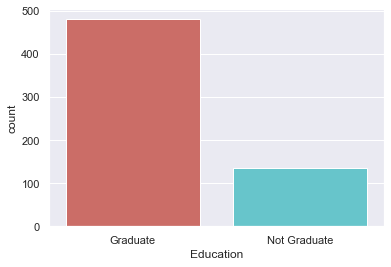

In [86]:
sns.countplot(x='Education', data=df, palette='hls', hue='Education')
plt.show()

In [87]:
countGrad = len(df[df['Education'] == 'Graduate'])
countNotGrad = len(df[df['Education'] == 'Not Graduate'])
countNull = len(df[df['Education'].isna()])

print(f'The percentage of graduates is {countGrad/(countGrad+countNotGrad+countNull) * 100:.2f}%')
print(f'The percentage of non-graduates is {countNotGrad/(countGrad+countNotGrad+countNull) * 100:.2f}%')
print(f'The percentage of missing values in the Education column is {countNull/(countGrad+countNotGrad+countNull) * 100:.2f}%')

The percentage of graduates is 78.18%
The percentage of non-graduates is 21.82%
The percentage of missing values in the Education column is 0.00%


 <span style="color:purple">The number of applicants that are graduates is higher than those that are not.</span>

### 3.1.5 Self Employed

In [88]:
df.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

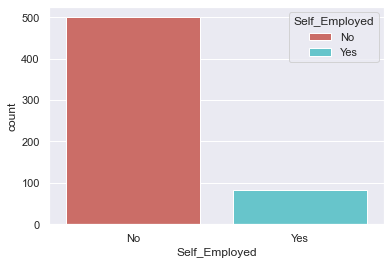

In [89]:
sns.countplot(x='Self_Employed', data=df, palette='hls', hue='Self_Employed')
plt.show()

In [90]:
countSE = len(df[df['Self_Employed'] == 'Yes'])
countNotSE = len(df[df['Self_Employed'] == 'No'])
countNull = len(df[df['Self_Employed'].isna()])

print(f'The percentage of self-employed applicants is {countSE/(countSE+countNotSE+countNull) * 100:.2f}%')
print(f'The percentage of non-self-employed applicants is {countNotSE/(countSE+countNotSE+countNull) * 100:.2f}%')
print(f'The percentage of missing values in the Self_Employed column is {countNull/(countSE+countNotSE+countNull) * 100:.2f}%')

The percentage of self-employed applicants is 13.36%
The percentage of non-self-employed applicants is 81.43%
The percentage of missing values in the Self_Employed column is 5.21%


 <span style="color:purple">The number of applicants that are not self-employed is higher compared to applicants that are self employed. It can also be seen that there are missing values in the column.</span>

### 3.1.6 Credit History

In [91]:
df['Credit_History'].value_counts(dropna=False)

1.0    475
0.0     89
NaN     50
Name: Credit_History, dtype: int64

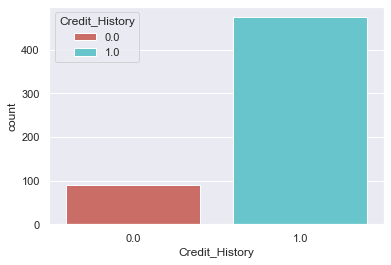

In [92]:
sns.countplot(x='Credit_History', data=df, palette='hls', hue='Credit_History')
plt.show()

In [93]:
countCH1 = len(df[df['Credit_History'] == 1])
countCH0 = len(df[df['Credit_History'] == 0])
countNull = len(df[df['Credit_History'].isna()])        

print(f'The percentage of applicants with a good credit history is {countCH1/(countCH1+countCH0+countNull) * 100:.2f}%')
print(f'The percentage of applicants with a bad credit history is {countCH0/(countCH1+countCH0+countNull) * 100:.2f}%')
print(f'The percentage of missing values in the Credit_History column is {countNull/(countCH1+countCH0+countNull) * 100:.2f}%')

The percentage of applicants with a good credit history is 77.36%
The percentage of applicants with a bad credit history is 14.50%
The percentage of missing values in the Credit_History column is 8.14%


 <span style="color:purple">The number of applicants with a good credit history is higher compared to the number of loan applicants with a bad credit history. There are also missing values in this column.</span>

### 3.1.7 Property Area

In [94]:
df['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [95]:
# Helper function for plotting count plots
def countPlot(x, data, palette='hls',):
    sns.countplot(x=x, data=data, palette=palette, hue=x)
    plt.show()

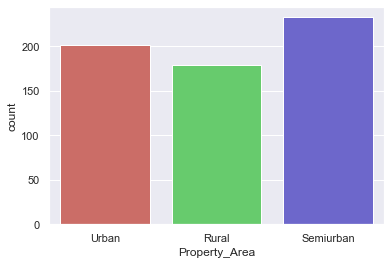

In [96]:
countPlot('Property_Area', df)

In [97]:
# Helper function for percentages
def percentages(x, data):
    val_counts = data[x].value_counts(dropna=False)
    for i in range(len(val_counts)):
        print(f'The percentage of {val_counts.index[i]} in the {x} column is {val_counts.values[i]/val_counts.values.sum() * 100:.2f}%')

In [98]:
percentages('Property_Area', df)

The percentage of Semiurban in the Property_Area column is 37.95%
The percentage of Urban in the Property_Area column is 32.90%
The percentage of Rural in the Property_Area column is 29.15%


 <span style="color:purple">There is a relatively balanced distribution between the property areas, however specifically: 
 - <span style="color:blue"> the number of applicants living in a Semiurban area is the highest</span>
 - <span style="color:crimson">the next most common property area among applicants being Urban </span>
 - <span style="color:green">finally applicants from Rural property areas being the lowest number.</span>

### 3.1.8 Loan Status

In [99]:
df['Loan_Status'].value_counts(dropna=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

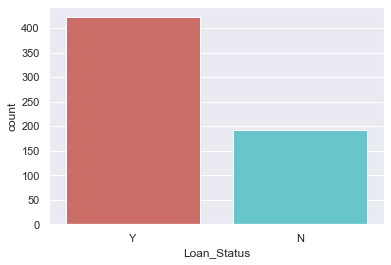

In [100]:
countPlot('Loan_Status', df)

In [101]:
percentages('Loan_Status', df)

The percentage of Y in the Loan_Status column is 68.73%
The percentage of N in the Loan_Status column is 31.27%


<span style="color:purple">The number of approved loans is higher than the number of rejected ones.</span>

### 3.1.9 Loan Amount Term

In [102]:
df['Loan_Amount_Term'].value_counts(dropna=False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

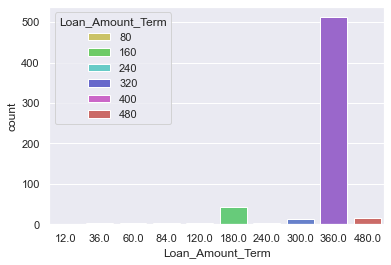

In [103]:
countPlot('Loan_Amount_Term', df)

In [104]:
percentages('Loan_Amount_Term', df)

The percentage of 360.0 in the Loan_Amount_Term column is 83.39%
The percentage of 180.0 in the Loan_Amount_Term column is 7.17%
The percentage of 480.0 in the Loan_Amount_Term column is 2.44%
The percentage of nan in the Loan_Amount_Term column is 2.28%
The percentage of 300.0 in the Loan_Amount_Term column is 2.12%
The percentage of 240.0 in the Loan_Amount_Term column is 0.65%
The percentage of 84.0 in the Loan_Amount_Term column is 0.65%
The percentage of 120.0 in the Loan_Amount_Term column is 0.49%
The percentage of 60.0 in the Loan_Amount_Term column is 0.33%
The percentage of 36.0 in the Loan_Amount_Term column is 0.33%
The percentage of 12.0 in the Loan_Amount_Term column is 0.16%


<span style="color:purple">360 Day loan amount term is the most popular duration amongst the other terms</span>

## 3.2 Numerical Variables

### 3.2.1 Describing the Numerical Variables

In [105]:
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


<a id="section3-2-2"></a>
### 3.2.2 Distribution of Numerical Variables

#### 3.2.2.1 Histogram Distribution

<AxesSubplot: xlabel='LoanAmount', ylabel='Count'>

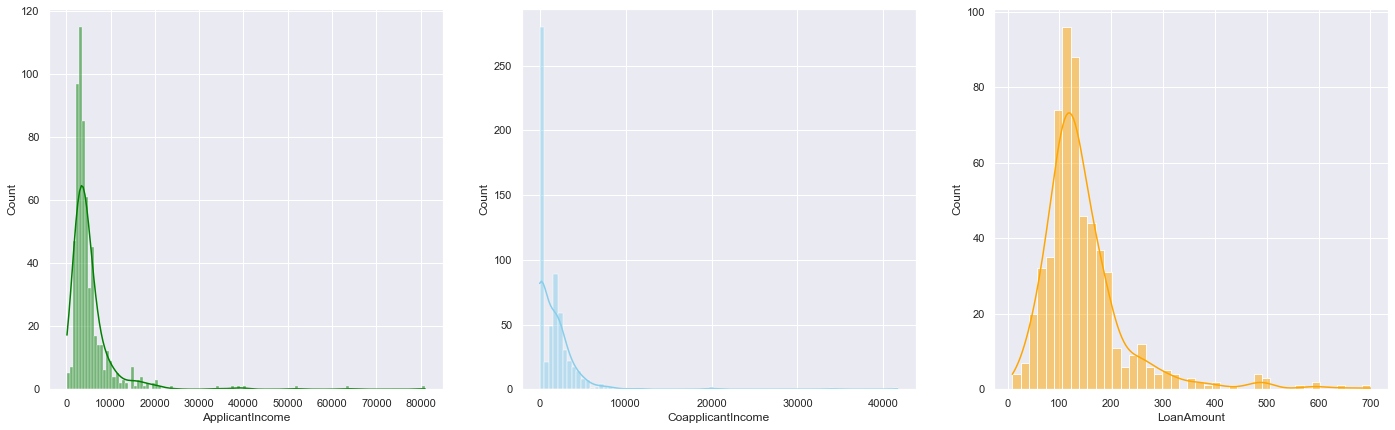

In [106]:
sns.set_theme(style='darkgrid')

fig, axes = plt.subplots(1, 3, figsize=(24,7))

sns.histplot(data=df, x='ApplicantIncome', ax=axes[0], color='green', kde=True)
sns.histplot(data=df, x='CoapplicantIncome', ax=axes[1], color='skyblue', kde=True)
sns.histplot(data=df, x='LoanAmount', ax=axes[2], color='orange', kde=True)

#### 3.2.2.2 Violin Plot

<AxesSubplot: ylabel='LoanAmount'>

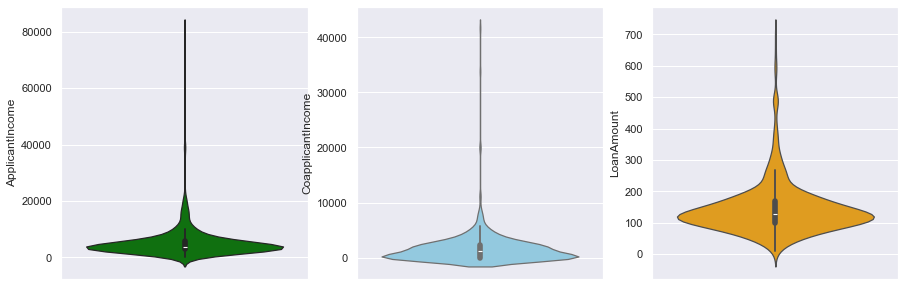

In [107]:
sns.set_theme(style='darkgrid')

fig, axes1 = plt.subplots(1, 3, figsize=(15,5))

sns.violinplot(data=df, y='ApplicantIncome', ax=axes1[0], color='green')
sns.violinplot(data=df, y='CoapplicantIncome', ax= axes1[1], color='skyblue')
sns.violinplot(data=df, y='LoanAmount', ax=axes1[2], color='orange')

<span style="color:purple">The distributions of Applicant Income, CoApplicant Income and Loan Amount are positively skewed and they have outliers</span>

## 3.3 Other Exploration

<span style="color:purple">This section will contain additional exploration for each variable such as bivariate analysis and heatmaps</span>

### 3.3.1 Heatmap

/var/folders/r7/kbd0hfy94qdghzcf7rxztnxm0000gn/T/ipykernel_32662/2751023961.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Greens')


<AxesSubplot: >

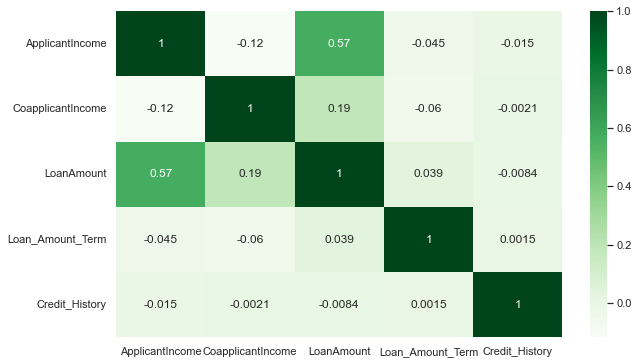

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

<span style="color:purple">There is a moderate positive correlation between Applicant Income and Loan Amount and a minimal positive correlation between CoApplicant Income and Loan Amount. There is a weak negative correlation between Applicant Income and CoApplicant Income, suggesting that applicants with higher income may have lower co-applicant income, but the relationship is weak. Most other correlations are very close to 0, indicating no significant linear relationship </span>

### 3.3.2 Comparing Categorical Variables

In [109]:
# Helper function to create a stacked bar chart to compare categorical variables
def cross_tab_bar(x, y, data):
    pd.crosstab(data[x], data[y]).plot(kind="bar", stacked=True, figsize=(8,8), color=['crimson', 'skyblue'])
    plt.title(f'{x} vs. {y}', fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=13)

    plt.show()

#### 3.3.2.1 Gender vs. Married

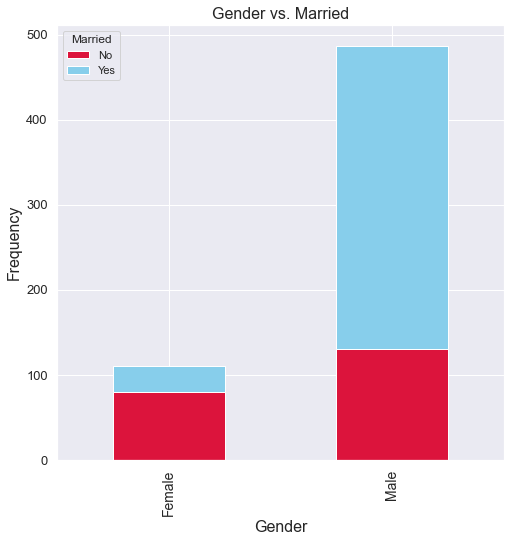

In [110]:
cross_tab_bar('Gender', 'Married', df)

<span style="color:purple">The majority of Female applicants are not married, whereas the majority of Male applicants are married. </span>

#### 3.3.2.2 Self Employed vs. Credit History

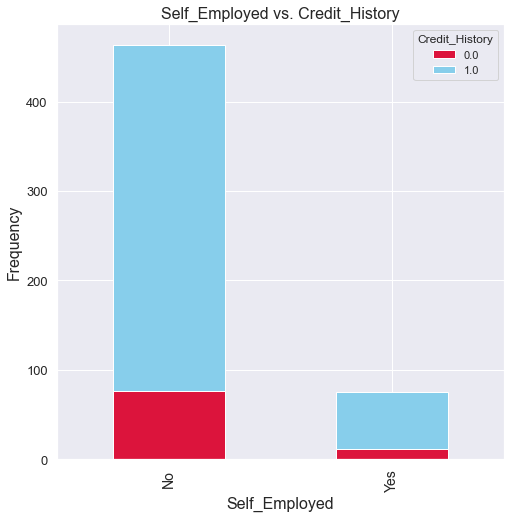

In [111]:
cross_tab_bar('Self_Employed', 'Credit_History', df)

<span style="color:purple"> Most Self Employed applicants have good credit history, as do most non-self employed applicants</span>

In [112]:
self_employed_good_credit = len(df[(df['Self_Employed'] == 'Yes') & (df['Credit_History'] == 1.0)])
self_employed_bad_credit = len(df[(df['Self_Employed'] == 'Yes') & (df['Credit_History'] == 0.0)])

not_self_employed_good_credit = len(df[(df['Self_Employed'] == 'No') & (df['Credit_History'] == 1.0)])  
not_self_employed_bad_credit = len(df[(df['Self_Employed'] == 'No') & (df['Credit_History'] == 0.0)]) 

self_employed_null = len(df[(df['Self_Employed'] == 'Yes') & (df['Credit_History'].isna())])
not_self_employed_null = len(df[(df['Self_Employed'] == 'No') & (df['Credit_History'].isna())])

print(f"Percentage of Self Employed applicants with Good Credit: {(self_employed_good_credit/countSE * 100):.2f}%")
print(f"Percentage of Self Employed applicants with Bad Credit: {(self_employed_bad_credit/countSE * 100):.2f}%")
print(f"Percentage of Self Employed applicants with Missing Credit History: {(self_employed_null/countSE * 100):.2f}%   ")
print("***********************************************************************")
print(f"Percentage of Non-Self Employed applicants with Good Credit: {(not_self_employed_good_credit/countNotSE * 100):.2f}%")
print(f"Percentage of Non-Self Employed applicants with Bad Credit: {(not_self_employed_bad_credit/countNotSE * 100):.2f}%")
print(f"Percentage of Non-Self Employed applicants with Missing Credit History: {(not_self_employed_null/countNotSE * 100):.2f}%")

Percentage of Self Employed applicants with Good Credit: 76.83%
Percentage of Self Employed applicants with Bad Credit: 14.63%
Percentage of Self Employed applicants with Missing Credit History: 8.54%   
***********************************************************************
Percentage of Non-Self Employed applicants with Good Credit: 77.40%
Percentage of Non-Self Employed applicants with Bad Credit: 15.20%
Percentage of Non-Self Employed applicants with Missing Credit History: 7.40%


<span style="color:purple"> The percentage of Self Employed applicants with Good Credit is similar to the percentage of Non-Self Employed applicants with Good Credit. Likewise for Bad Credit applicants within this variable.</span>

#### 3.3.2.3 Property Area vs. Loan Status

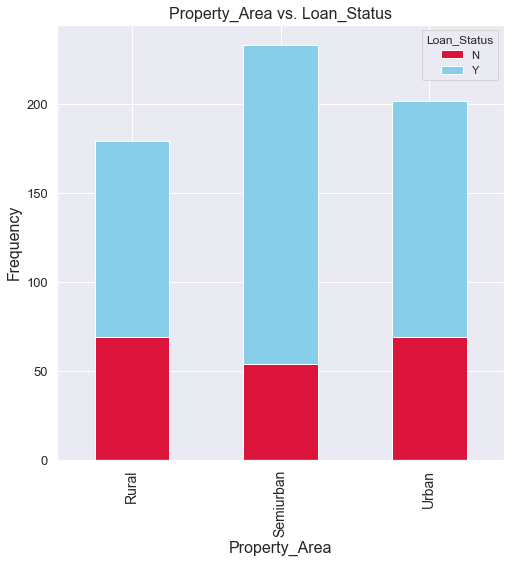

In [113]:
cross_tab_bar('Property_Area', 'Loan_Status', df)

<span style="color:purple"> Applicants living in Semiurban property areas are more likely to have their loans approved compared to applicants in other areas. Rural property areas have the lowest number of loan approvals. Across all property areas, loan approvals (blue) consistently outnumber rejections (red)</span>

### 3.3.3 Categorical Variables vs. Numerical Variables

#### 3.3.3.1 Loan Status vs. Applicant Income

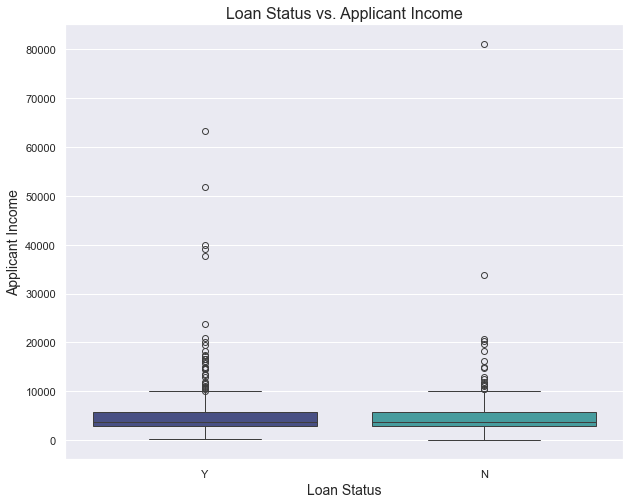

In [114]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, palette='mako', hue='Loan_Status')
plt.title('Loan Status vs. Applicant Income', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Applicant Income', fontsize=14)
plt.show()


<span style="color:purple"> There are lots of outliers in Applicant Income, and the distribution is positively skewed, representing applicants with very high incomes. These individuals do not conform to the main income distribution. Even applicants with extremely high incomes can have their loans rejected. The median (horizontal line in each box) is slightly higher for rejected loans. This suggests that higher income alone does not guarantee loan approval. </span>

#### 3.3.3.2 Loan Status vs. Co-Applicant Income

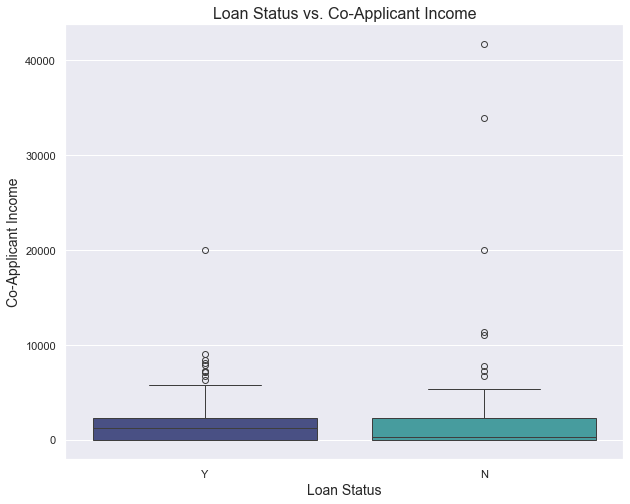

In [115]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Loan_Status', y='CoapplicantIncome', data=df, palette='mako', hue='Loan_Status')
plt.title('Loan Status vs. Co-Applicant Income', fontsize=16)
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Co-Applicant Income', fontsize=14)
plt.show()

<span style="color:purple"> The interquartile range (central box) is relatively similar for both approved and rejected loans with the incomes closely concentrated around lower values (close to zero), indicating that most Co-Applicant Incomes are relatively low for both approved and rejected loans. The median for Co-Applicant Income is lower for rejected loans than for approved loans. Again, there are outliers in Co-Applicant Income for both approved and rejected loans, representing very high Co-Applicant Incomes. Despite these high incomes, some loans are still rejected, suggesting that Co-Applicant Income alone is not a strong determinant of loan approval.</span>

#### 3.3.3.3 Loan Status vs. Loan Amount

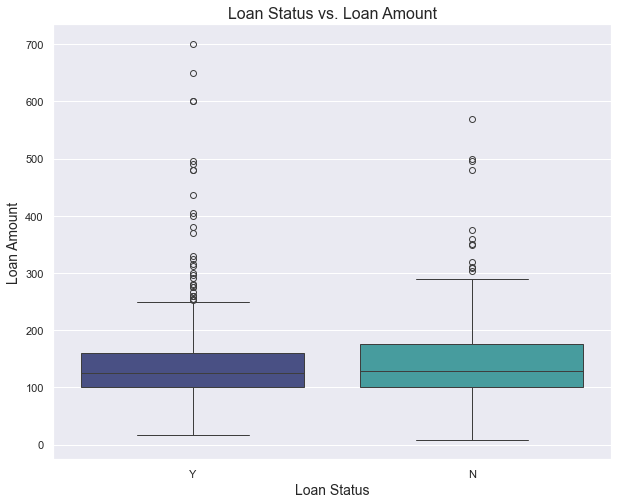

In [116]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df, palette='mako', hue='Loan_Status')
plt.title('Loan Status vs. Loan Amount', fontsize=16)   
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.show()

- <span style="color:purple">The distributions of loan amounts for approved and rejected loans are fairly similar. Both groups have comparable interquartile ranges, with loan amounts mostly between approximately 100 and 180.</span>
- <span style="color:purple"> The median loan amount for rejected loans is slightly higher than for approved loans, but the difference is not substantial.  </span>

- <span style="color:purple"> Both groups contain outliers representing very large loan amounts, indicating that very high loan amounts are not common, regardless of approval status.</span>

- <span style="color:purple"> Since there is a significant overlap between the distributions for approved and rejected loans, the loan amount alone doesn't appear to be a strong factor in determining approval.</span>

### 3.3.4 Numerical Variables vs. Numerical Variables

In [117]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### 3.3.4.1 Applicant Income vs. Co-Applicant Income

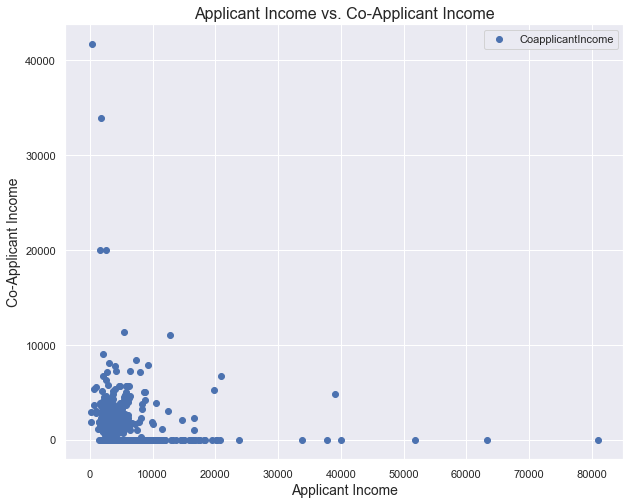

In [118]:
plt.figure(figsize=(10,8))
df.plot(x='ApplicantIncome', y='CoapplicantIncome', style='o', ax=plt.gca())
plt.title('Applicant Income vs. Co-Applicant Income', fontsize=16)
plt.xlabel('Applicant Income', fontsize=14)
plt.ylabel('Co-Applicant Income', fontsize=14)
plt.show()

In [119]:
# Pearson's Correlation - Way to measure how much two variables are connected

print(f"Pearson's Correlation: {df['ApplicantIncome'].corr(df['CoapplicantIncome'])}")

Pearson's Correlation: -0.11660458122889966


In [120]:
# T-Test: 
""" Compares the averages of the two groups, looks at variability
    and checks if the difference is too big to be just random chance 
"""
# P-Value:
"""
    Probaility of getting your results if the null-hypothesis is true,
    small p-value (e.g: < 0.05): unlikely results happened by chance
"""
t_test, p_val = stats.ttest_ind(df['ApplicantIncome'], df['CoapplicantIncome'])

print(f"T-Test: {t_test:.2f} \nP-Value: {p_val}")

T-Test: 13.84 
P-Value: 1.4609839484240346e-40


- <span style='color: purple'> There is a very weak negative correlation between Applicant Income and Co-Applicant Income, indicating almost no linear relationship between the two groups.</span>

- <span style='color: purple'> The T-Value is very high, meaning there is a large difference between the means of the two groups relative to their variability</span>

- <span style='color: purple'> The P-Value is extremely small, indicating the difference between the two groups is statistically significant, and we can reject the null-hypothesis</span>

- <span style='color: purple'> In summary, the average Applicant Income is very different from the average Co-Applicant Income, and this difference is real (not by chance)</span>

### 3.4 Null Values

In [121]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot: >

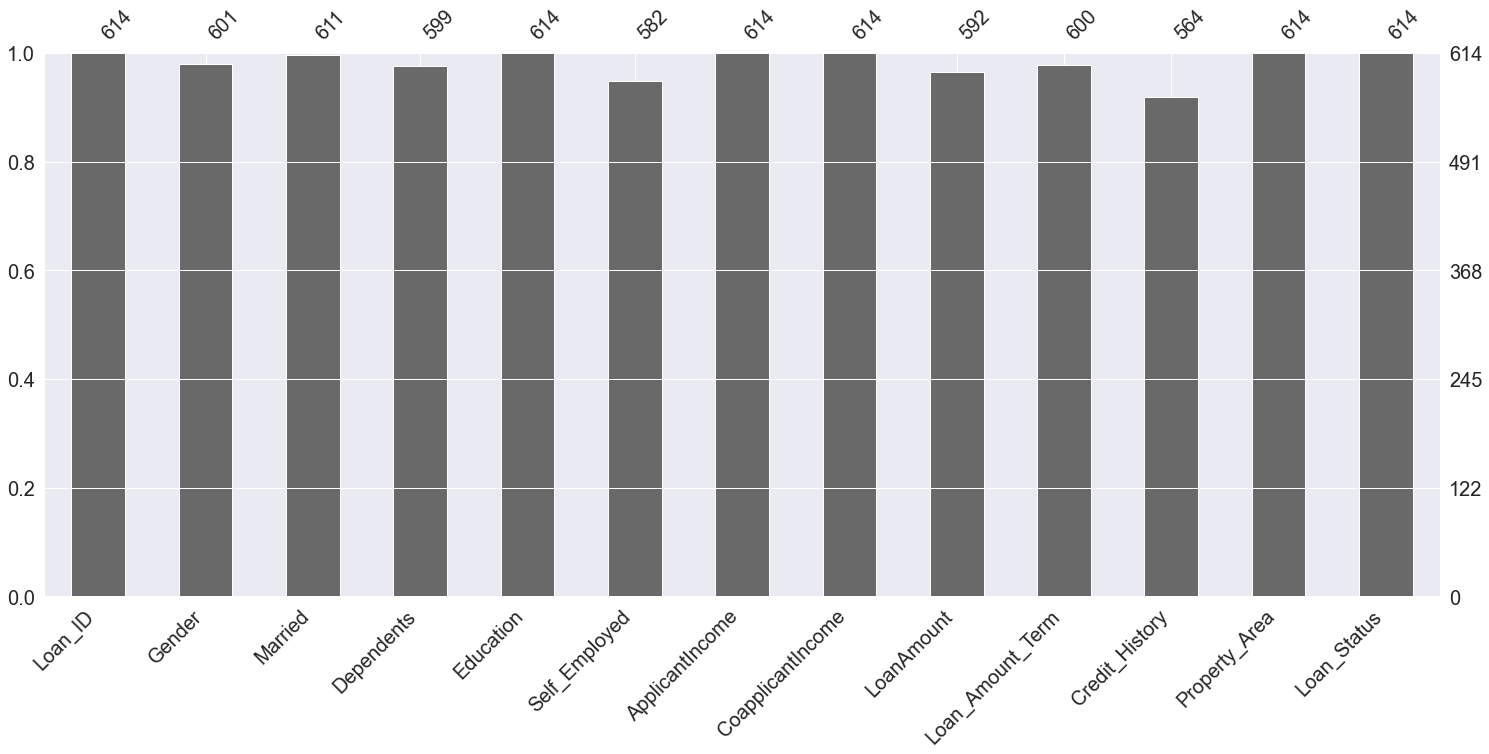

In [122]:
plt.figure(figsize=(24,5))
mso.bar(df, fontsize = 20)

<span style='color:purple'> 7 columns contain null values, I must decide how to handles these e.g: imputing values (using averages/medians/mode) or dropping rows/columns if the missing values are significant</span>

---

# 4. Data Preprocessing

## 4.1 Drop Unnecessary Variables

In [123]:
df = df.drop(columns='Loan_ID')

Training data only has 614 rows, so dropping rows might reduce the training data significantly. If only a few values are missing (<10%), imputing is a good choice. 

## 4.2 Data Imputation

### 4.2.1 Categorical Variables

In [124]:
# I'll impute categorical variables using the mode

# Helper function for imputation using mode
def impute_mode(column, data=df):
    data[column].fillna(df[column].mode()[0], inplace=True)

impute_mode('Gender')
impute_mode('Married')
impute_mode('Dependents')
impute_mode('Self_Employed')
impute_mode('Credit_History')
impute_mode('Loan_Amount_Term')

### 4.2.2 Numerical Variables

In [125]:
# I will use the median to impute the missing data in Loan Amount
# since the data isn't normally distributed (skewed to one side) and there are significant outliers
# (the median is not affected by extreme values)

df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [126]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot: >

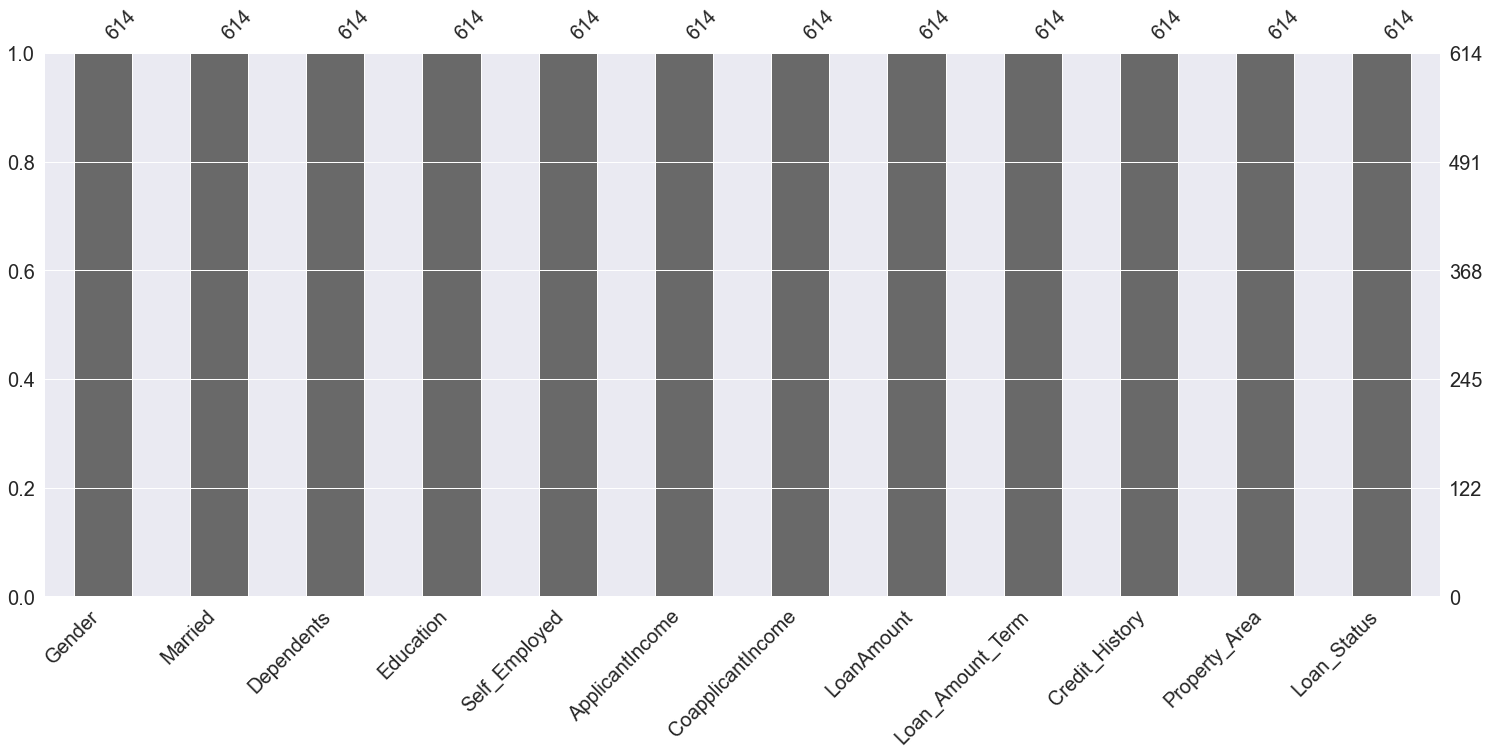

In [127]:
plt.figure(figsize=(24,5))
mso.bar(df, fontsize = 20)

## 4.3 One-Hot Encoding

In [128]:
# Transform Categorical Variables into numbers so that a ML model can use them
# One-Hot because with Label Encoding, the model might think there's a meaningful order, which is wrong for categories
# One-Hot encoding avoids this by treating each category as independent 

df = pd.get_dummies(df)

In [129]:
pd.DataFrame({'Columns': df.columns})

,Columns
0,ApplicantIncome
1,CoapplicantIncome
2,LoanAmount
3,Loan_Amount_Term
4,Credit_History
5,Gender_Female
6,Gender_Male
7,Married_No
8,Married_Yes
9,Dependents_0


In [130]:
# Drop columns to avoid redundancy, 
# if you know the value of one category, you can infer the value of the other(s)

df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 'Education_Graduate': 'Education',
       'Self_Employed_Yes': 'Self_Employed', 'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

In [131]:
pd.DataFrame({'Columns': df.columns})

,Columns
0,ApplicantIncome
1,CoapplicantIncome
2,LoanAmount
3,Loan_Amount_Term
4,Credit_History
5,Gender
6,Married
7,Dependents_0
8,Dependents_1
9,Dependents_2


## 4.4 Remove Outliers & Infinite Values

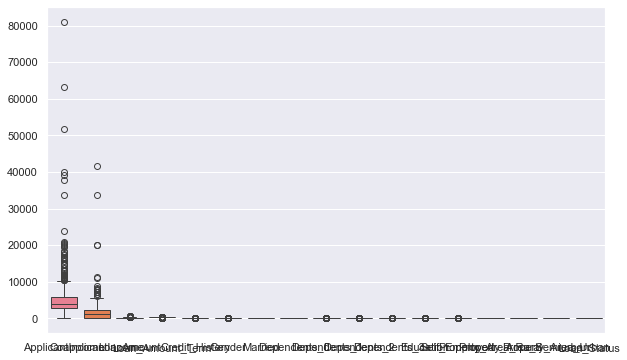

In [132]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

In [133]:
""" STEP 1: Calculate Quartiles"""
Q1 = df.quantile(0.25) # First Quartile (25% Mark)
Q3 = df.quantile(0.75) # Third Quartile (75% Mark)
IQR = Q3 - Q1 # Interquartile Range (middle 50% of data)

""" STEP 2: Define Outlier Limits"""
# A data point is an outlier if it is:
upper_limit = Q3 + (1.5 * IQR) # More than (1.5 * IQR) above the Third quartile
lower_limit = Q1 - (1.5 * IQR) # More than (1.5 * IQR) below the First Quartile

"""STEP 3: Filter Out Outliers"""
df = df[~((df > upper_limit) | (df < lower_limit)).any(axis=1)]

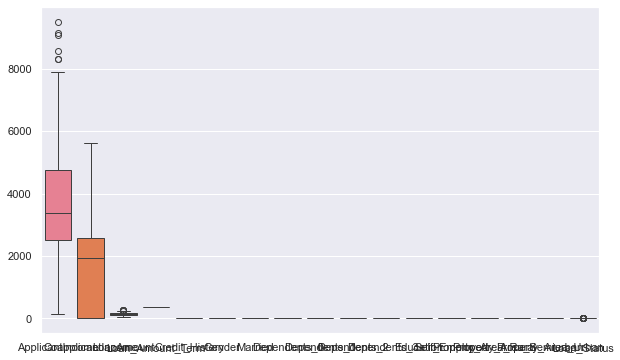

In [134]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.show()

<AxesSubplot: >

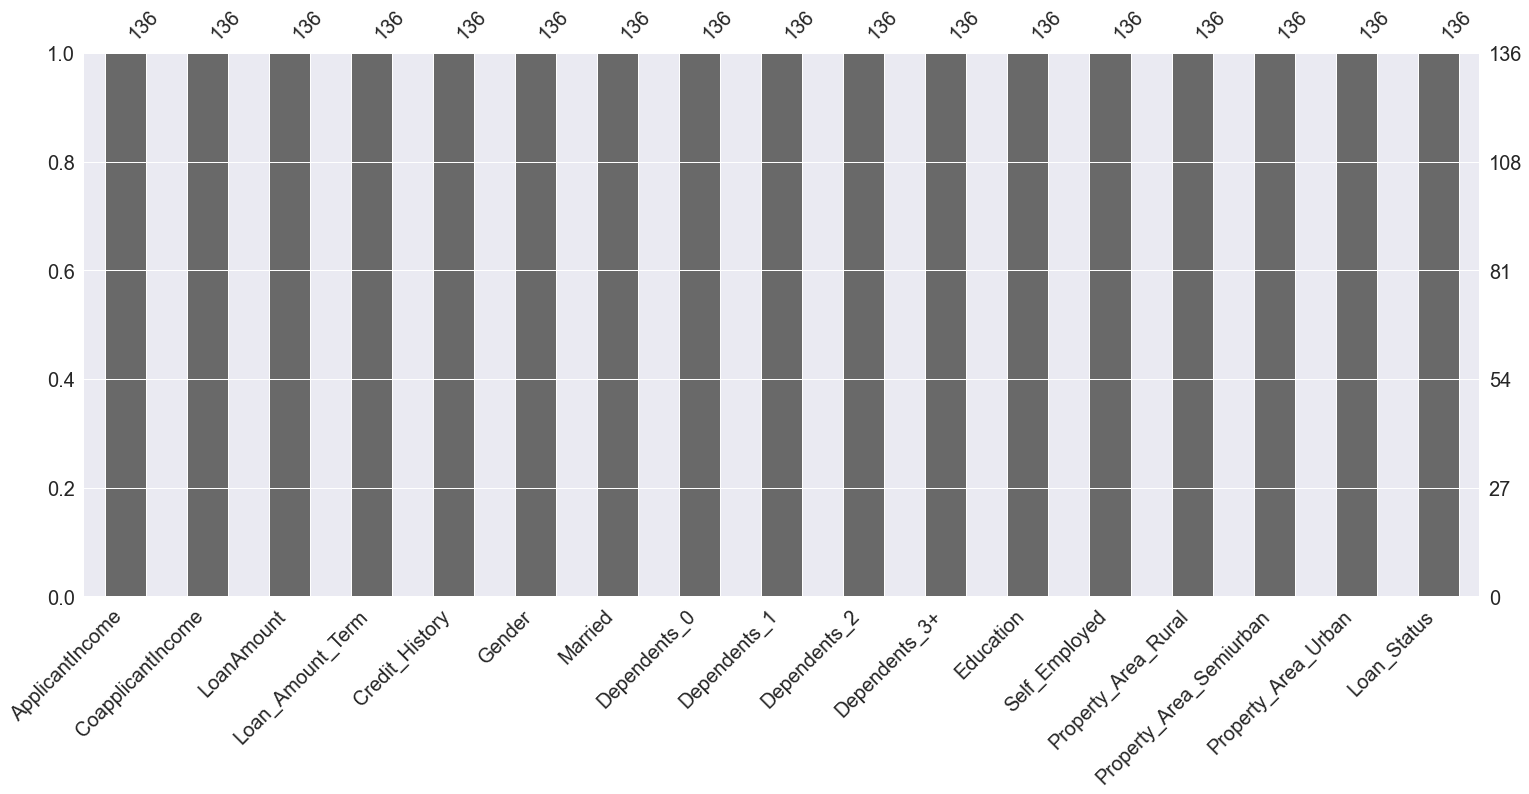

In [135]:
plt.figure(figsize=(24,5))
mso.bar(df, fontsize = 20)

## 4.5 Skewed Distribution Treatment

- <span style="color: purple"> In Section **3.2.2** I found that the distributions of Applicant Income, Co-Applicant Income and Loan Amount are positively skewed.  </span>

- <span style="color: crimson"> Skewed data can mess up ML models because some methods (like regression) assume the data is more evenly spread (closer to a normal distribution), so fixing it makes the data easier for the model to understand.</span>

- <span style="color: green"> I will use Square Root Transformation to normalise the distributions. This will reduce the size of big numbers more than small ones, which helps "pull in" the long tail. This makes the data more balanced and less skewed.</span>

In [136]:
# Square Root Transformation

df.ApplicantIncome = np.sqrt(df.ApplicantIncome)
df.CoapplicantIncome = np.sqrt(df.CoapplicantIncome)
df.LoanAmount = np.sqrt(df.LoanAmount)

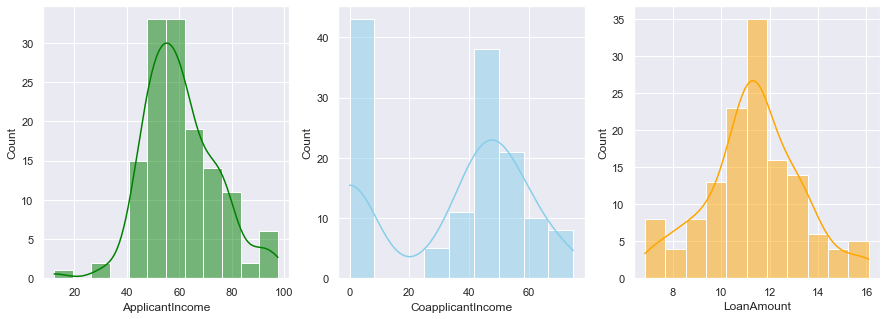

In [137]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df, x='ApplicantIncome', kde=True, ax = axs[0], color='green')
sns.histplot(data=df, x='CoapplicantIncome', kde=True, ax = axs[1], color='skyblue')
sns.histplot(data=df, x='LoanAmount', kde=True, ax = axs[2], color='orange')

plt.show()

<span style="color:purple">After applying the Square Root Transformation, the distribution looks much better compared to the original ones: </span>

[Go to Section 3.2.2](#section3-2-2)



## 4.6 Feature Separating

In [138]:
X = df.drop(columns=['Loan_Status'], axis=1) # Independent Features (data used to predict y)
y = df['Loan_Status'] # Dependent Feature (column we are trying to predict)

## 4.7 SMOTE Technique

<span style="color:purple"> - In Section 3.1.8, I found that the data contains more approved loans (Y) than rejected loans (N) </span>

<span style="color:crimson"> - This imbalance can cause problems because the ML model might get "lazy" and just predict the majority class (e.g: "Y" for everything), ignoring the minority class </span>

<span style="color:green">- SMOTE (Synthetic Minority Oversampling Technique) adds fake data to balance the two groups. </span>

<span style="color:green">- It creates new examples for the minority class (Loan_Status = N) by "mixing" existing data </span>

<span style="color:green">- This makes the dataset more balanced and prevents the model from overfitting to the majority class </span>

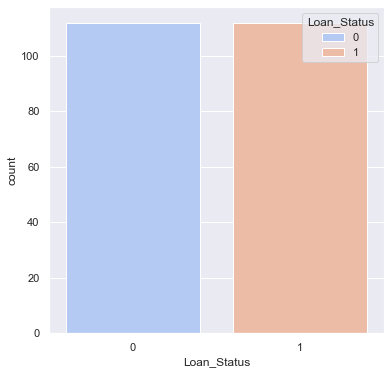

In [139]:
X, y = SMOTE().fit_resample(X, y)

plt.figure(figsize=(6,6))
sns.countplot(x=y, palette="coolwarm", hue=y)
plt.show()

The distribution of Loan_Status is now balanced

## 4.8 Data Normalization

- The dataset contains different features (e.g: ApplicantIncome, LoanAmount etc.) and their values might vary a lot

- These large differences in scale can confuse some ML models, especially ones that rely on distances like k-NN or logistic regression

- Normalization scales all features so that they have the same range, typicall between 0 and 1. This ensures that
    - No feature dominates others just because it has larger values
    - The models treats all features fairly

- MinMaxScaler shrinks the data into a 0-1 range 

In [140]:
X = MinMaxScaler().fit_transform(X)

## 4.9 Splitting Data Set

In [141]:
# 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 608
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          136 non-null    float64
 1   CoapplicantIncome        136 non-null    float64
 2   LoanAmount               136 non-null    float64
 3   Loan_Amount_Term         136 non-null    float64
 4   Credit_History           136 non-null    float64
 5   Gender                   136 non-null    uint8  
 6   Married                  136 non-null    uint8  
 7   Dependents_0             136 non-null    uint8  
 8   Dependents_1             136 non-null    uint8  
 9   Dependents_2             136 non-null    uint8  
 10  Dependents_3+            136 non-null    uint8  
 11  Education                136 non-null    uint8  
 12  Self_Employed            136 non-null    uint8  
 13  Property_Area_Rural      136 non-null    uint8  
 14  Property_Area_Semiurban  1

---

# 5. Models

## 5.1 Logistic Regression

Logistic regression is a statistical and machine learning method used for binary classification problems - where the output variable (target) has only two possible outcomes, such as 0/1, True/False, or Yes/No

In [147]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred, y_test)
print(f'LR accuracy: {LRAcc*100:.2f}%')

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        23
           1       0.75      0.82      0.78        22

    accuracy                           0.78        45
   macro avg       0.78      0.78      0.78        45
weighted avg       0.78      0.78      0.78        45

[[17  6]
 [ 4 18]]
LR accuracy: 77.78%


## 5.2 K-Nearest Neighbour (KNN)

K-Nearest Neighbour (KNN) is a simple and intuitive machine learning algorithm used for classification and regression tasks. It works based on principle of similarity - objects that are "close" to each other are likely to belong to the same group or have similar values.

When given a new data point to predict, KNN:

- 1. Calculates the distance between the new point and all points in the training data (e.g: Euclidean distance is commonly used)

- 2. Finds that K nearest neighbours to the new point (i.e. the closest K data points)

- 3. Classifies or predicts based on those nearest neighbours:
    - For classification: Takes a majority vote of the labels of the neihbours
    - For regression: Takes the average of the values of the neighbours

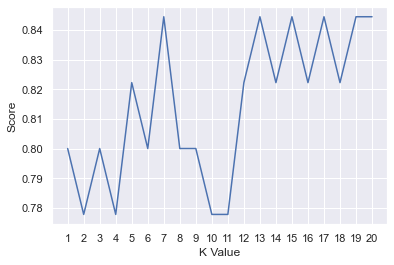

KNN best accuracy: 84.44%


In [148]:
scoreListknn = []
for i in range(1, 21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1, 21), scoreListknn)
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('K Value')
plt.ylabel('Score')
plt.show()

KNacc = max(scoreListknn)
print(f"KNN best accuracy: {KNacc*100:.2f}%")